# Linear Regression with SciKit (SKLearn)

In [20]:
# For working with arrays
import numpy as np

# For importing CSV file data into a dataframe
import pandas as pd

# For plotting different graphs
import matplotlib.pyplot as plt
import seaborn as sns

# For constructing train and test data
from sklearn.model_selection import train_test_split

# For conducting regression
from sklearn.linear_model import LinearRegression

# For results avaluation
from sklearn import metrics

%matplotlib inline

In [3]:
# Sample housing data for USA
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# General info on the data such as number of rows (5000) and number columns or features (7)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Statistical info on the data
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Training

In [6]:
# independent variables (Column Names). The 'Address' column is left aside since it has only textual data.
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [7]:
# dependent variable
y = df['Price']

In [8]:
# Splitting data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [9]:
# Instantiating a linear regression model
lm = LinearRegression()

In [10]:
# Training the model
lm.fit(x_train,y_train)

LinearRegression()

# Predictions

In [11]:
predictions = lm.predict(x_test)

In [13]:
# Predicted prices
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [42]:
# Actual prices
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

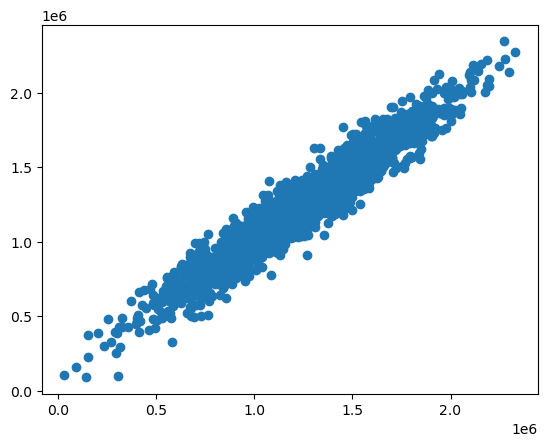

In [26]:
plt.scatter(y_test,predictions)

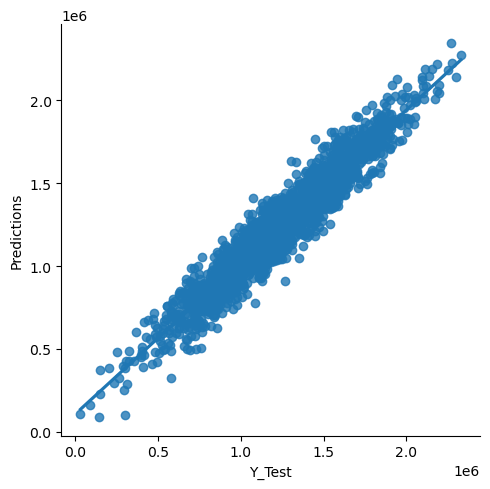

In [27]:
df = pd.DataFrame({'Y_Test': y_test, 'Predictions': predictions})
sns.lmplot(data=df, x='Y_Test', y='Predictions')

# Evaluation

In [28]:
# Root Mean Squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))

In [29]:
rmse

102278.82922291153